<a href="https://colab.research.google.com/github/alexandre-sarquis/NLP/blob/main/wordcloudNLP_TC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install psycopg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 167 kB 6.7 MB/s 
     |████████████████████████████████| 74 kB 1.4 MB/s 


In [2]:
import psycopg 
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
conn = psycopg.connect("dbname=postgres user=ALUNO_NLP_TC password=ALUNO_NLP_TC " + \
                       "port=5432 " + \
                       "host=ec2-18-231-126-109.sa-east-1.compute.amazonaws.com")

OperationalError: ignored

In [ ]:
dfResult = pd.read_sql('SELECT TX_PLAIN_TEXT FROM DECISOES_NLP_TC LIMIT 10', conn)

In [ ]:
dfResult2 = pd.read_sql('SELECT COUNT(*) FROM TABELA_NILC_NLP_TC WHERE VT_NORM_VET IS NOT NULL', conn)

In [ ]:
dfResult2.head()

,count
0,382966


In [ ]:
txBase = dfResult['tx_plain_text'][0]

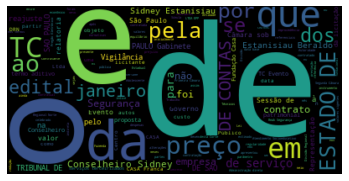

In [ ]:
wordcloud = WordCloud().generate(txBase)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
!pip install -U spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.6 MB 30.2 MB/s 
  Attempting uninstall: spacy
    Found existing installation: spacy 3.4.3
    Uninstalling spacy-3.4.3:
      Successfully uninstalled spacy-3.4.3


In [ ]:
import spacy

In [ ]:
!python -m spacy download pt_core_news_lg

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2022-12-14 21:09:57.920174: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 568.2 MB 13 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')


In [ ]:
!pip install https://huggingface.co/explosion/pt_udv25_portuguesebosque_trf/resolve/main/pt_udv25_portuguesebosque_trf-any-py3-none-any.whl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |███████████████████████████████ | 834.1 MB 1.7 MB/s eta 0:00:18tcmalloc: large alloc 1147494400 bytes == 0x39ab0000 @  0x7f7a6f46b615 0x5d6f4c 0x51edd1 0x51ef5b 0x4f750a 0x4997a2 0x4fd8b5 0x4997c7 0x4fd8b5 0x49abe4 0x4f5fe9 0x55e146 0x4f5fe9 0x55e146 0x4f5fe9 0x55e146 0x5d8868 0x5da092 0x587116 0x5d8d8c 0x55dc1e 0x55cd91 0x5d8941 0x49abe4 0x55cd91 0x5d8941 0x4990ca 0x5d8868 0x4997a2 0x4fd8b5 0x49abe4
     |████████████████████████████████| 863.9 MB 6.6 kB/s 
     |████████████████████████████████| 293 kB 4.5 MB/s 
     |████████████████████████████████| 6.2 MB 60.3 MB/s 
     |████████████████████████████████| 53 kB 1.7 MB/s 
     |████████████████████████████████| 671 kB 60.3 MB/s 
     |████████████████████████████████| 13.7 MB 46.9 MB/s 
     |████████████████████████████████| 53 kB 2.2 MB/s 
     |████████████████████████████████| 4.4 MB 47.7 MB/s 
     |████████████████████████

In [ ]:
import spacy

In [ ]:
nlp = spacy.load('pt_core_news_lg')

In [ ]:
doc = nlp(txBase)

In [ ]:
txLemmaStop = ''
for token in doc:
    if not token.is_stop:
        txLemmaStop += token.text + ' '


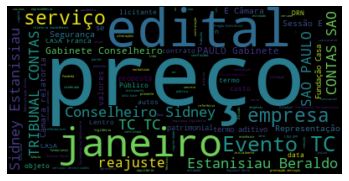

In [ ]:
wordcloudLS = WordCloud().generate(txLemmaStop)
plt.imshow(wordcloudLS, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 5.2 MB/s 
     |████████████████████████████████| 7.6 MB 52.4 MB/s 
     |████████████████████████████████| 182 kB 69.1 MB/s 


In [ ]:
import transformers

In [ ]:
from transformers import pipeline

In [ ]:
contexto = txBase = dfResult['tx_plain_text'][1]


In [ ]:
modelo = 'pierreguillou/bert-large-cased-squad-v1.1-portuguese'
nlp = pipeline("question-answering", model=modelo)

Downloading:   0%|          | 0.00/918 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/506 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/210k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
pergunta = r"Quanto a nova lei de licitações entra em vigência?"

In [ ]:
resultado = nlp(question=pergunta, context=contexto)

In [ ]:
print(f"Resposta: {resultado['answer']}, score: {round(resultado['score'], 4)}, início: {resultado['start']}, fim: {resultado['end']}")

Resposta: 20-05-14, score: 0.4601, início: 103, fim: 111
